# Reinforcement Learning 

In [19]:
import pandas as pd
import numpy as np

# Set the column names for 10 ads
column_names = [f'Ad {i}' for i in range(1, 11)]

# Initialize an empty dictionary to hold the data
data = {}

# Create 10 columns with different probabilities for 0s and 1s
# For some ads, make 1 more probable, for others, make 0 more probable

# Define probabilities for each column (e.g., Ad 1 more likely to be 1, Ad 2 more likely to be 0, etc.)
probabilities = [
    [0.2, 0.8],  # Ad 1: 20% chance of 0, 80% chance of 1
    [0.7, 0.3],  # Ad 2: 70% chance of 0, 30% chance of 1
    [0.4, 0.6],  # Ad 3: 40% chance of 0, 60% chance of 1
    [0.8, 0.2],  # Ad 4: 80% chance of 0, 20% chance of 1
    [0.3, 0.7],  # Ad 5: 30% chance of 0, 70% chance of 1
    [0.6, 0.4],  # Ad 6: 60% chance of 0, 40% chance of 1
    [0.1, 0.9],  # Ad 7: 10% chance of 0, 90% chance of 1
    [0.9, 0.1],  # Ad 8: 90% chance of 0, 10% chance of 1
    [0.5, 0.5],  # Ad 9: 50% chance of 0, 50% chance of 1 (random)
    [0.2, 0.8]   # Ad 10: 20% chance of 0, 80% chance of 1
]

# Generate data for each column based on the specified probabilities
for i, prob in enumerate(probabilities):
    data[f'Ad {i+1}'] = np.random.choice([0, 1], size=2500, p=prob)

# Create the DataFrame
df = pd.DataFrame(data)

# Display the first few rows
print(df.head())

# Optionally save to a CSV
# df.to_csv('ads_dataset_weighted.csv', index=False)


   Ad 1  Ad 2  Ad 3  Ad 4  Ad 5  Ad 6  Ad 7  Ad 8  Ad 9  Ad 10
0     1     1     1     0     0     1     1     0     1      1
1     1     0     1     0     1     0     1     0     1      1
2     1     0     0     0     1     0     1     0     0      1
3     1     0     1     0     0     1     0     0     0      1
4     1     0     1     0     1     0     1     1     1      1


In [20]:
df.head(8)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,1,1,0,0,1,1,0,1,1
1,1,0,1,0,1,0,1,0,1,1
2,1,0,0,0,1,0,1,0,0,1
3,1,0,1,0,0,1,0,0,0,1
4,1,0,1,0,1,0,1,1,1,1
5,0,1,1,0,0,0,1,0,0,1
6,0,0,1,0,1,0,1,0,1,1
7,0,0,0,0,1,0,1,0,1,0


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

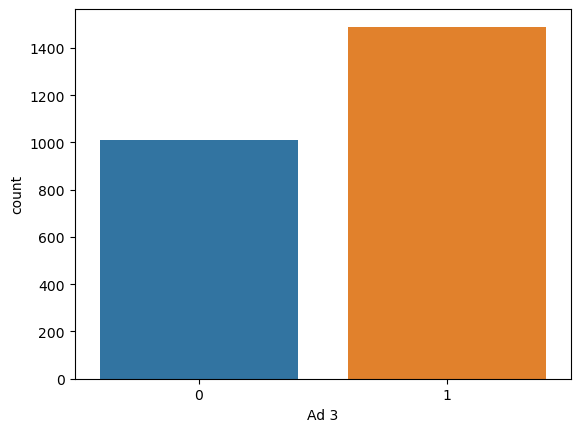

In [22]:
sns.countplot(x="Ad 3",data=df)
plt.show()

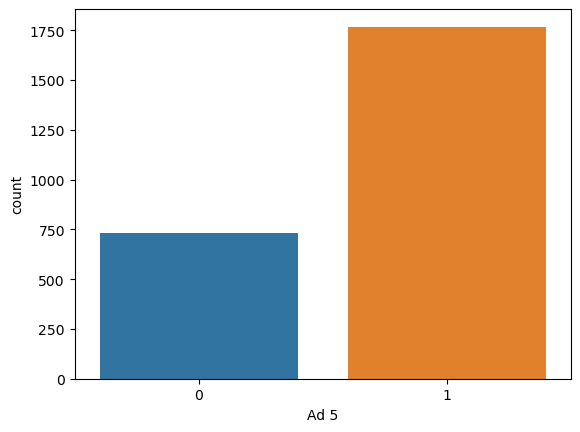

In [23]:
sns.countplot(x="Ad 5",data=df)
plt.show()

# Upper Confidence Bound Algorithm

In [24]:
N_rounds = 2500  # Number of rounds (rows in dataset)
n_ads = 10       # Number of ads (columns in dataset)
chosen_ads = []
n_times_selected = [0] * n_ads
sums_of_rewards = [0] * n_ads
total_reward = 0

In [27]:
import math

for round_num in range(0, N_rounds):
    chosen_ad = 0
    max_upper_bound = 0
    
    for ad_index in range(0, n_ads):
        if (n_times_selected[ad_index] > 0):
            avg_reward = sums_of_rewards[ad_index] / n_times_selected[ad_index]
            confidence_interval = math.sqrt(3/2 * math.log(round_num + 1) / 
                                            n_times_selected[ad_index])
            upper_bound = avg_reward + confidence_interval
        else:
            upper_bound = 1e400  
            # Assigning a very large number to ensure unselected ads are prioritized
        if (upper_bound > max_upper_bound):
            max_upper_bound = upper_bound
            chosen_ad = ad_index  
            # Change 'ad = i' to 'ad_index' to ensure correct ad selection

    # Update selected ad list and reward trackers
    chosen_ads.append(chosen_ad)
    n_times_selected[chosen_ad] += 1

    # Simulate reward: You will replace this with actual reward in practice
    reward = df.values[round_num,chosen_ad]  
    # 1 or 0 based on your reward mechanism (could be from a dataset)
    
    sums_of_rewards[chosen_ad] += reward
    total_reward += reward

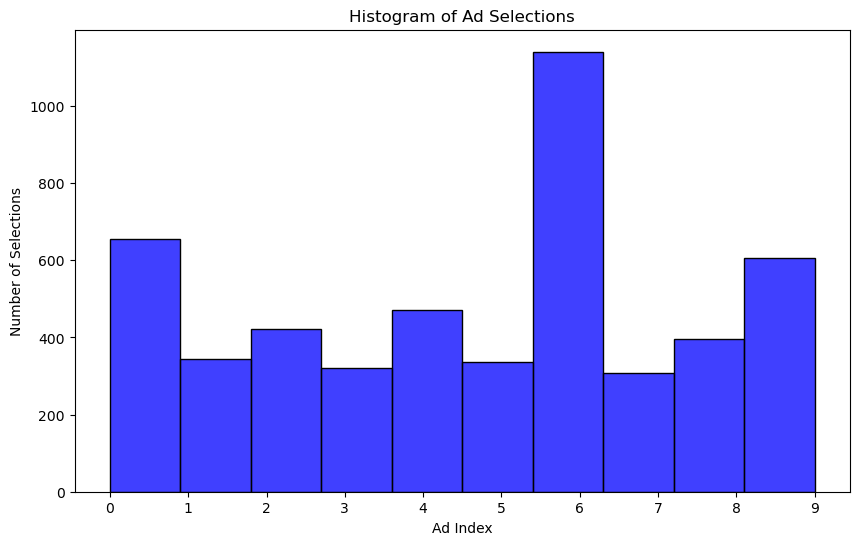

In [28]:
# Plot a histogram of the chosen ads
plt.figure(figsize=(10,6))
sns.histplot(chosen_ads, bins=n_ads, kde=False, color='blue')

# Customize the plot
plt.title('Histogram of Ad Selections')
plt.xlabel('Ad Index')
plt.ylabel('Number of Selections')
plt.xticks(range(n_ads))  # Ensures ticks for each ad index
plt.show()

# Thompson Sampling

In [35]:
import random

# Parameters
N_rounds = 2500  # Number of rounds
n_ads = 10        # Number of ads
ads_selected = []
rewards_for_1 = [0] * n_ads  
# Number of times reward 1 (clicked) received for each ad
rewards_for_0 = [0] * n_ads  
# Number of times reward 0 (not clicked) received for each ad
total_reward = 0

In [32]:
# Loop over each round (N_rounds represents total rounds)
for round_num in range(0, N_rounds):
    selected_ad = 0
    max_random_draw = 0
    
    # Loop over each ad to select the ad with the highest random distribution
    for ad_index in range(0, n_ads):
        # Draw from the beta distribution based on the number of rewards for ad
        random_beta = random.betavariate(rewards_for_1[ad_index] + 1, 
                                         rewards_for_0[ad_index] + 1)
        
        # Select the ad with the highest random beta draw
        if random_beta > max_random_draw:
            max_random_draw = random_beta
            selected_ad = ad_index
    
    # Append the selected ad to the list of ads chosen
    ads_selected.append(selected_ad)
    
    # Simulate the reward: Replace 'dataset.values' with your actual reward data
    reward = df.values[round_num, selected_ad]  
    
    # Update the reward counts based on the outcome (1 or 0)
    if reward == 1:
        rewards_for_1[selected_ad] += 1
    else:
        rewards_for_0[selected_ad] += 1
    
    # Update the total reward
    total_reward += reward


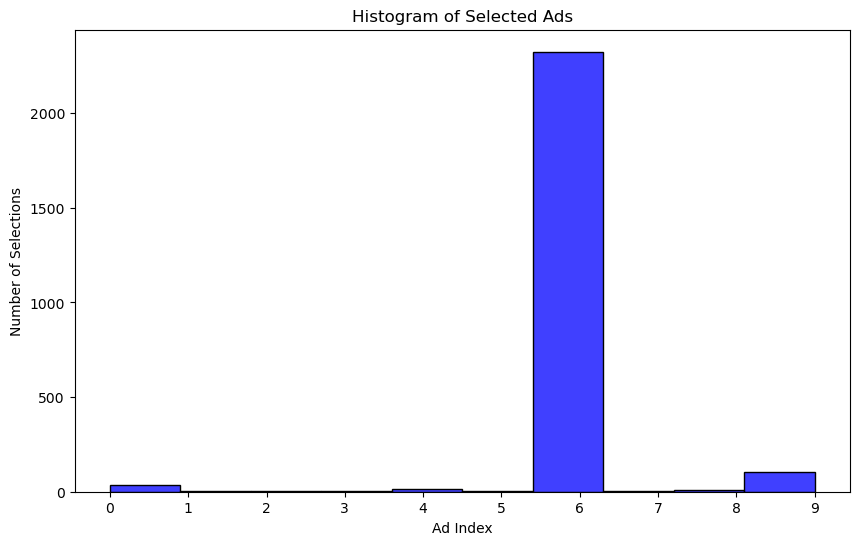

In [33]:
# Plot a histogram of the selected ads
plt.figure(figsize=(10, 6))
sns.histplot(ads_selected, bins=n_ads, kde=False, color='blue')

# Customize the plot
plt.title('Histogram of Selected Ads')
plt.xlabel('Ad Index')
plt.ylabel('Number of Selections')
plt.xticks(range(n_ads))  # Ensure ticks for each ad index
plt.show()